**imports**

In [22]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

**Data Validation**

In [3]:
df = pd.read_csv('d:/BankCustomer/data/bank.csv')

In [6]:
df.head(7).T

,0,1,2,3,4,5,6
age,59,56,41,55,54,42,56
job,Farmers,Farmers,technician,services,Farmers,management,management
marital,married,married,married,married,married,single,married
education,secondary,secondary,secondary,secondary,tertiary,tertiary,tertiary
default,no,no,no,no,no,no,no
balance,234300,4500,127000,247600,18400,0,83000
Yearly income,234567.0,307600.0,500000.0,234000.0,327600.0,216500.0,222600.0
Number of Children,0,4,0,3,1,0,2
housing,yes,no,yes,yes,no,yes,yes
loan,no,no,no,no,no,yes,yes


In [8]:
df.tail(5).T

,11155,11156,11157,11158,11159
age,35,34,33,39,32
job,blue-collar,blue-collar,blue-collar,services,technician
marital,married,single,single,married,single
education,secondary,secondary,primary,secondary,secondary
default,no,no,no,no,no
balance,8000,-720,100,73300,2900
Yearly income,89840.0,8085.6,1123.0,82315.0,32567.0
Number of Children,2,0,0,0,0
housing,yes,yes,yes,no,no
loan,yes,no,no,no,no


In [9]:
### Loaded Successfully, no error

<center><b>Basic EDA</b></center>

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11160 entries, 0 to 11159
Data columns (total 19 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   age                 11160 non-null  int64  
 1   job                 11160 non-null  object 
 2   marital             11160 non-null  object 
 3   education           11160 non-null  object 
 4   default             11160 non-null  object 
 5   balance             11160 non-null  int64  
 6   Yearly income       11160 non-null  float64
 7   Number of Children  11160 non-null  int64  
 8   housing             11160 non-null  object 
 9   loan                11160 non-null  object 
 10  contact             11160 non-null  object 
 11  day                 11160 non-null  int64  
 12  month               11160 non-null  object 
 13  duration            11160 non-null  int64  
 14  campaign            11160 non-null  int64  
 15  pdays               11160 non-null  int64  
 16  prev

In [11]:
### Convert to float32 - 5   balance 11160 non-null int64 | Yearly income 11160 non-null  float64
### Convert all int64 -> int32
### Fromat column name

In [13]:
new_cols = [name.lower().replace(' ', '_') for name in df.columns]
new_cols

['age',
 'job',
 'marital',
 'education',
 'default',
 'balance',
 'yearly_income_',
 'number_of_children',
 'housing',
 'loan',
 'contact',
 'day',
 'month',
 'duration',
 'campaign',
 'pdays',
 'previous',
 'poutcome',
 'deposit']

In [14]:
data = df.copy()

In [16]:
data.columns = new_cols
data.columns

Index(['age', 'job', 'marital', 'education', 'default', 'balance',
       'yearly_income_', 'number_of_children', 'housing', 'loan', 'contact',
       'day', 'month', 'duration', 'campaign', 'pdays', 'previous', 'poutcome',
       'deposit'],
      dtype='object')

In [ ]:
# check missing values

In [17]:
data.isnull().sum()

age                   0
job                   0
marital               0
education             0
default               0
balance               0
yearly_income_        0
number_of_children    0
housing               0
loan                  0
contact               0
day                   0
month                 0
duration              0
campaign              0
pdays                 0
previous              0
poutcome              0
deposit               0
dtype: int64

In [ ]:
### no missing values

**Qualitative/Categorical Analysis**

In [21]:
data.select_dtypes('object').head()

,job,marital,education,default,housing,loan,contact,month,poutcome,deposit
0,Farmers,married,secondary,no,yes,no,unknown,may,unknown,yes
1,Farmers,married,secondary,no,no,no,unknown,may,unknown,yes
2,technician,married,secondary,no,yes,no,unknown,may,unknown,yes
3,services,married,secondary,no,yes,no,unknown,may,unknown,yes
4,Farmers,married,tertiary,no,no,no,unknown,may,unknown,yes


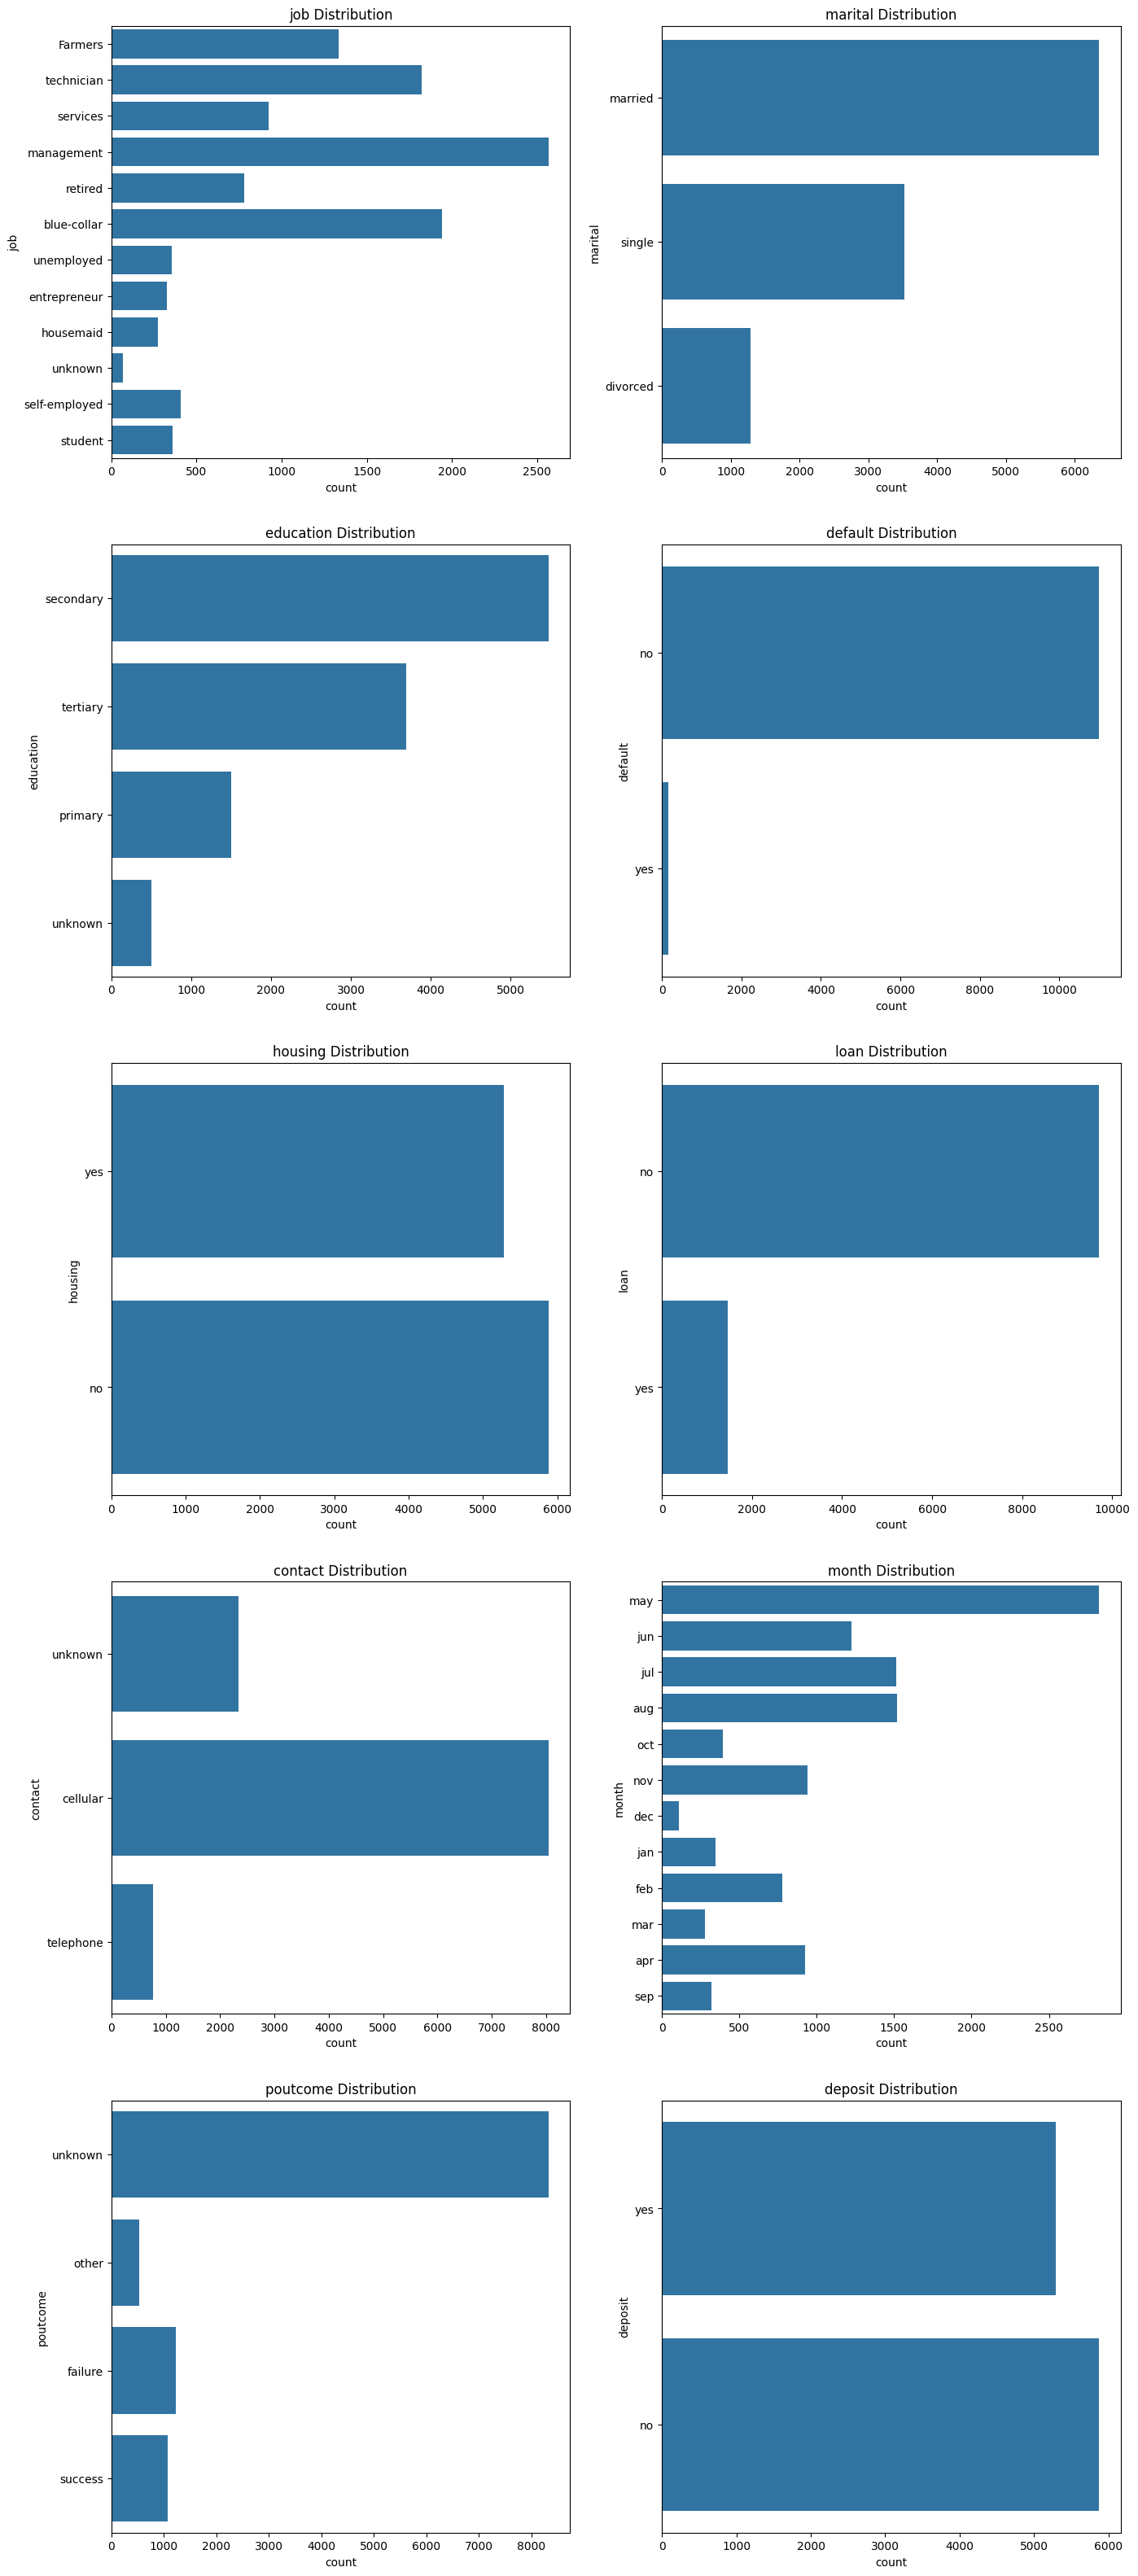

In [28]:
cols = data.select_dtypes('object').head().columns

fig, grid = plt.subplots(5, 2, figsize=(16, 40))
index = 0
for row in range(5):
    for col in range(2):
        feature = cols[index]
        index = index + 1
        sns.countplot(data=data, y=data[feature], ax=grid[row, col])
        grid[row, col].set_title(f"{feature} Distribution")
plt.show()

In [ ]:
### 

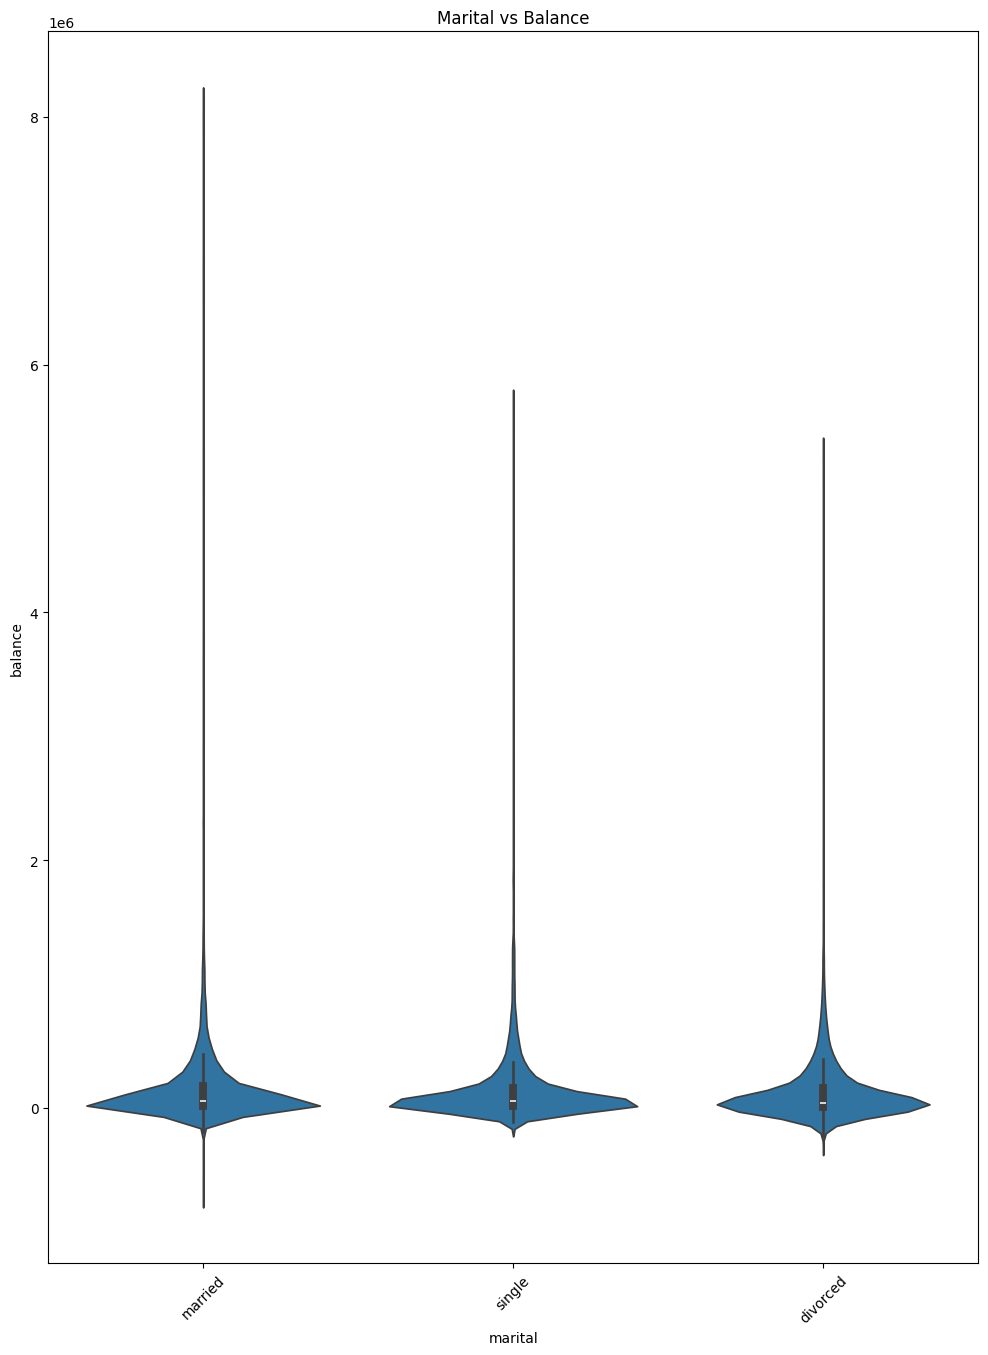

In [33]:
# Multivariate analysis using box plots
plt.figure(figsize=(12, 16))
sns.violinplot(data=data, x='marital', y='balance')
plt.title('Marital vs Balance')
plt.xticks(rotation=45)
plt.show()


In [35]:
data.groupby(by='marital').agg({'balance':['mean', 'median']})

balance         
                   mean   median
marital                         
divorced  137241.647332  43900.0
married   160058.444637  58000.0
single    145739.542638  53950.0

In [ ]:
### comaparitively balance has deacreasing order - married, single, divorced

In [38]:
data.loc[data.poutcome=='success',].groupby(by='marital').agg({'poutcome':['count']})

,poutcome
,count
marital,
divorced,105
married,593
single,373


In [39]:
data.loc[data.poutcome=='failure',].groupby(by='marital').agg({'poutcome':['count']})

,poutcome
,count
marital,
divorced,113
married,711
single,403


In [41]:
data.loc[data.poutcome=='success',].groupby(by='marital').agg({'poutcome':['count']}) /data.groupby(by='marital').agg({'poutcome':['count']})

,poutcome
,count
marital,
divorced,0.081206
married,0.093401
single,0.106026


**Quantitative/Numerical Analysis**

In [43]:
data.select_dtypes(['float64', 'int64'])

,age,balance,yearly_income_,number_of_children,day,duration,campaign,pdays,previous
0,59,234300,234567.0,0,5,1042,1,-1,0
1,56,4500,307600.0,4,5,1467,1,-1,0
2,41,127000,500000.0,0,5,1389,1,-1,0
3,55,247600,234000.0,3,5,579,1,-1,0
4,54,18400,327600.0,1,5,673,2,-1,0
...,...,...,...,...,...,...,...,...,...
11155,35,8000,89840.0,2,21,38,2,172,2
11156,34,-720,8085.6,0,7,273,5,-1,0
11157,33,100,1123.0,0,20,257,1,-1,0
11158,39,73300,82315.0,0,16,83,4,-1,0


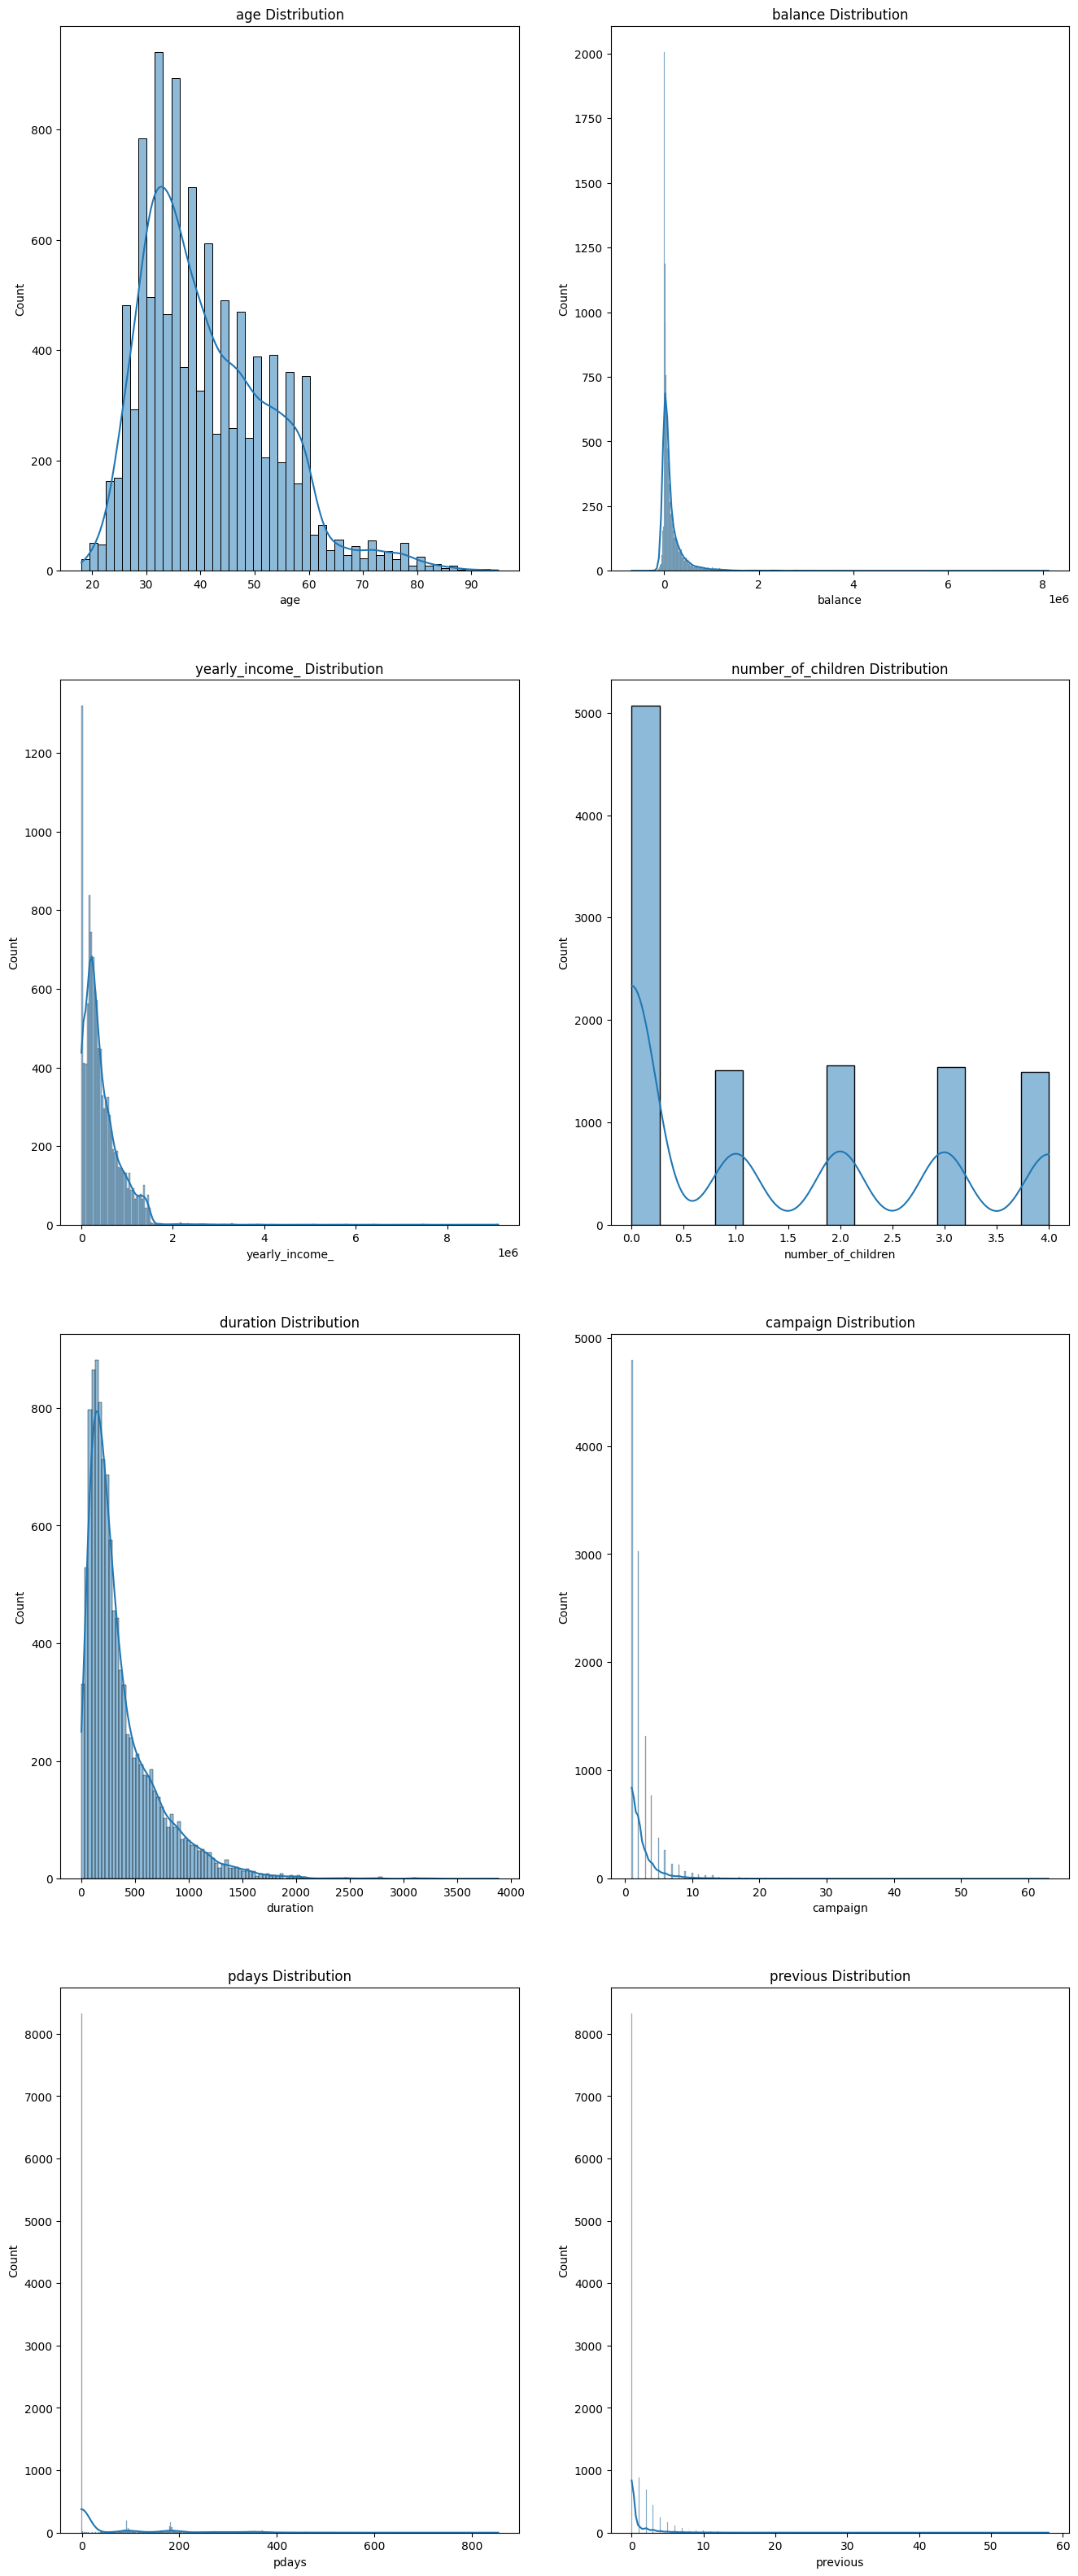

In [49]:
cols = data.select_dtypes(['float64', 'int64']).drop(columns=['day']).columns

fig, grid = plt.subplots(4, 2, figsize=(16, 40))
index = 0
for row in range(4):
    for col in range(2):
        feature = cols[index]
        index = index + 1
        sns.histplot(data=data, x=data[feature], ax=grid[row, col], kde=True)
        grid[row, col].set_title(f"{feature} Distribution")
plt.show()